In [70]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [71]:
# Loading data
DATA_PATH = "../data/"

mall = pd.read_csv(f'{DATA_PATH}mall_v1.csv')
store = pd.read_csv(f'{DATA_PATH}store_v1.csv')
cost = pd.read_csv(f'{DATA_PATH}cost_v1.csv')
traffic_store = pd.read_csv(f'{DATA_PATH}people_flow_v1.csv')
traffic_mall = pd.read_csv(f'{DATA_PATH}mall_traffic.csv')
ref_traffic = pd.read_csv(f'{DATA_PATH}referenciel_traffic_v1.csv')
dwell_time = pd.read_csv(f'{DATA_PATH}dwell_time_v1.csv')

In [72]:
# Merging all dataframes to conduct analyses
traffic_store_final = pd.merge(left=ref_traffic, right=traffic_store, on=["block_id", "external_mall_id"])
traffic_store_final = pd.merge(left=dwell_time, right=traffic_store_final, on=["block_id", "external_mall_id"])

store_final = pd.merge(left=store, right=traffic_store_final, on="store_id")
store_final = pd.merge(left=store_final, right=mall, on="mall_id")

cost["store_id"] = cost["store_id"].fillna(0)
cost["store_id"] = cost["store_id"].astype(int)

store_final = pd.merge(left=store_final, right=cost, on="store_id")
store_final = pd.merge(left=store_final, right=traffic_mall, on="external_mall_id")

# Cleaning data
store_final.drop_duplicates(inplace=True)

In [73]:
store_final.head()

,store_name,store_id,mall_id,store_year_opened,store_year_closed,store_branch_level_1,store_branch_level_2,store_branch_level_3,store_sales_r12m,store_rent_r12m,...,real_estate_taxes_r12m,large_scale_works_r12m,maintenance_works_r12m,visits_in_monthly_average,visits_out_monthly_average,visits_in_daily_average,visits_out_daily_average,total_visits_in,total_visits_out,avg_dwell_time
0,store_1,1,0,28/10/2010,NaN,Services,Clothing-related services,Clothes repairs,291179.0,NaN,...,NaN,424.0,NaN,1208202.1,1157749.7,43617.4,41796.02,12082021,11577497,60.88
1,store_2,2,0,28/10/2010,NaN,Culture & Media & Technology,Electronics and household appliances,Monobrand electronics,NaN,184498.0,...,12361.0,NaN,42319.0,1208202.1,1157749.7,43617.4,41796.02,12082021,11577497,60.88
2,store_3,3,0,28/10/2010,NaN,Bags & Footwear & Accessories,Accessories,"Mixed: small accessories, bags and fancy jewel...",NaN,396868.0,...,NaN,NaN,NaN,1208202.1,1157749.7,43617.4,41796.02,12082021,11577497,60.88
3,store_4,4,0,28/10/2010,NaN,Services,Photo services,Photo Development,5536831.0,501842.0,...,414791.0,NaN,NaN,1208202.1,1157749.7,43617.4,41796.02,12082021,11577497,60.88
4,store_5,5,0,23/10/1990,NaN,Health & Beauty,"Perfumery, beautycare",Monobrand mainstream,340042.0,78000.0,...,NaN,NaN,335361.0,1208202.1,1157749.7,43617.4,41796.02,12082021,11577497,60.88


In [74]:
store_final = store_final.drop(columns=['external_mall_id', 'block_id'])

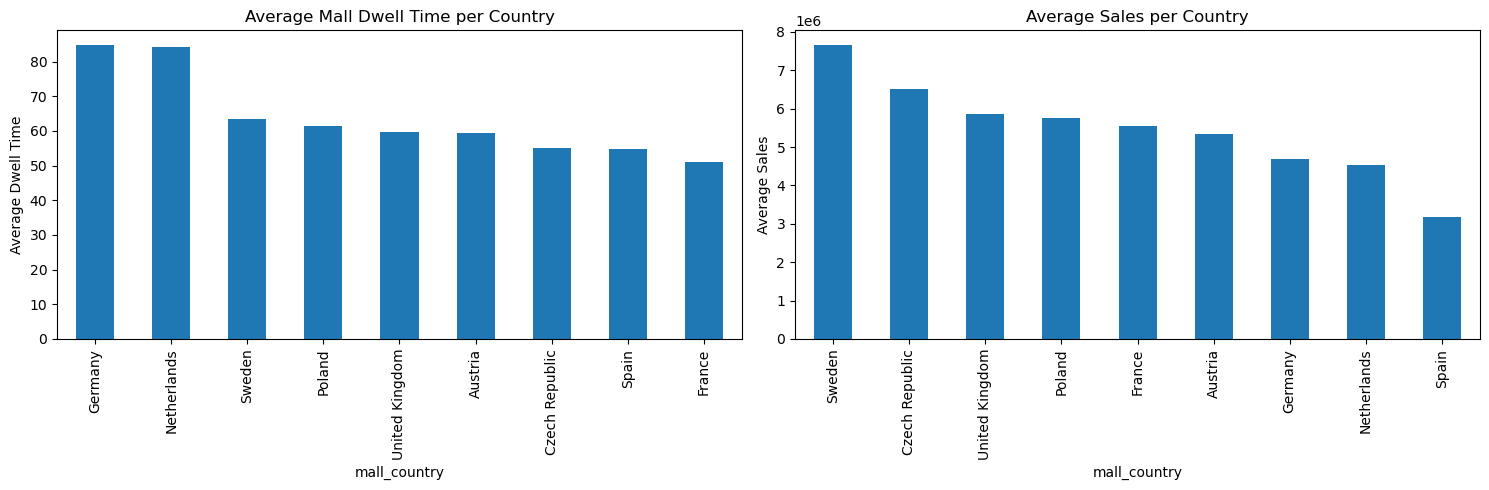

In [88]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plot average mall dwell time per country
store_final.groupby("mall_country").mean("avg_dwell_time")["avg_dwell_time"].sort_values(ascending=False).plot(kind='bar', ax=axes[0], title="Average Mall Dwell Time per Country")
axes[0].set_ylabel('Average Dwell Time')

# Plot average sales per country
store_final.groupby("mall_country")["store_sales_r12m"].mean().sort_values(ascending=False).plot(kind='bar', ax=axes[1], title="Average Sales per Country")
axes[1].set_ylabel('Average Sales')

plt.tight_layout()
plt.show()

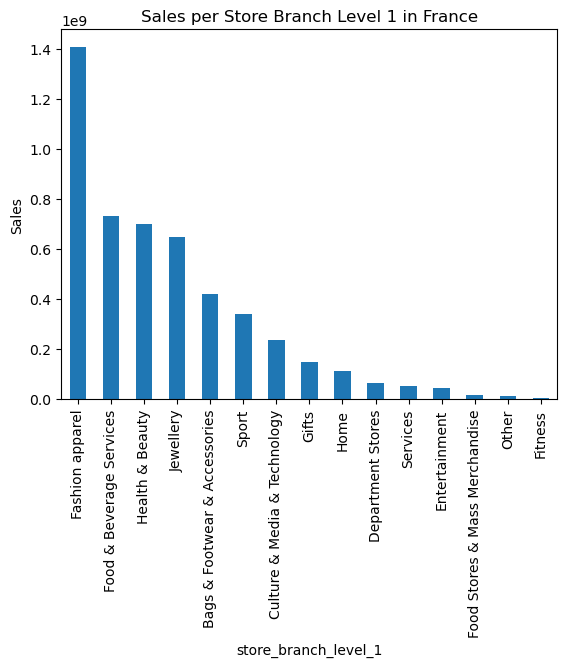

In [76]:
# Filter the data for France
store_final_france = store_final[store_final['mall_country'] == 'France']

# Group by store branch level 1 and sum the sales
sales_per_branch = store_final_france.groupby('store_branch_level_1')['store_sales_r12m'].sum().sort_values(ascending=False)

# Plot the sales per store branch level 1
sales_per_branch.plot(kind='bar', title='Sales per Store Branch Level 1 in France')
plt.ylabel('Sales')
plt.show()

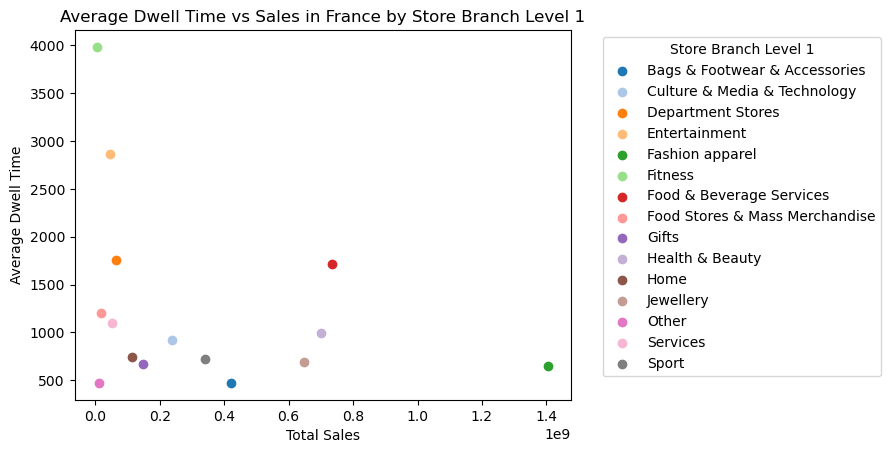

In [77]:
# Calculate the average dwell time and total sales per store branch level 1 in France
avg_dwell_time_sales = store_final_france.groupby('store_branch_level_1').agg({
    'average_dwell_time': 'mean',
    'store_sales_r12m': 'sum'
})

# Define a colormap
cmap = plt.get_cmap('tab20')

# Create a color for each store branch level 1
colors = {category: cmap(i) for i, category in enumerate(avg_dwell_time_sales.index)}

# Plot the scatter plot with colors
fig, ax = plt.subplots()
for category, color in colors.items():
    data = avg_dwell_time_sales.loc[category]
    ax.scatter(data['store_sales_r12m'], data['average_dwell_time'], label=category, color=color)

# Add legend
ax.legend(title='Store Branch Level 1', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_title('Average Dwell Time vs Sales in France by Store Branch Level 1')
ax.set_xlabel('Total Sales')
ax.set_ylabel('Average Dwell Time')
plt.show()


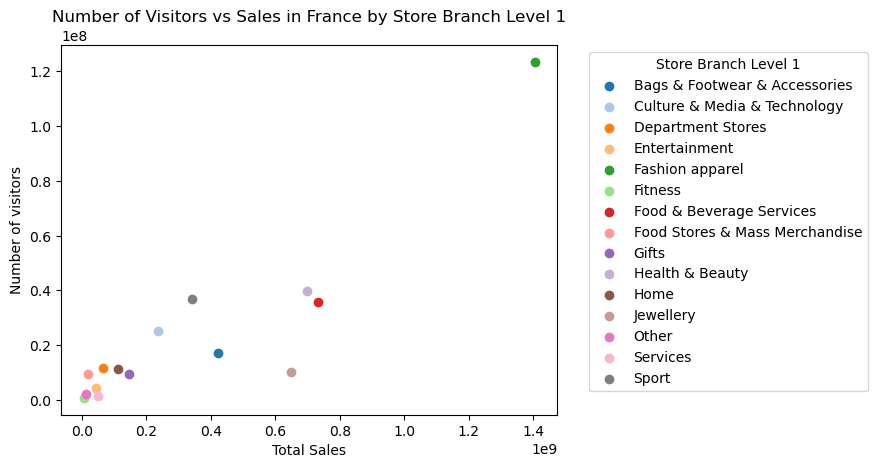

In [78]:
# Calculate the average traffic and total sales per store branch level 1 in France
avg_traffic_sales = store_final_france.groupby('store_branch_level_1').agg({
    'store_total_visits': 'sum',
    'store_sales_r12m': 'sum'
})

# Define a colormap
cmap = plt.get_cmap('tab20')

# Create a color for each store branch level 1
colors = {category: cmap(i) for i, category in enumerate(avg_traffic_sales.index)}

# Plot the scatter plot with colors
fig, ax = plt.subplots()
for category, color in colors.items():
    data = avg_traffic_sales.loc[category]
    ax.scatter(data['store_sales_r12m'], data['store_total_visits'], label=category, color=color)

# Add legend
ax.legend(title='Store Branch Level 1', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_title('Number of Visitors vs Sales in France by Store Branch Level 1')
ax.set_xlabel('Total Sales')
ax.set_ylabel('Number of visitors')
plt.show()


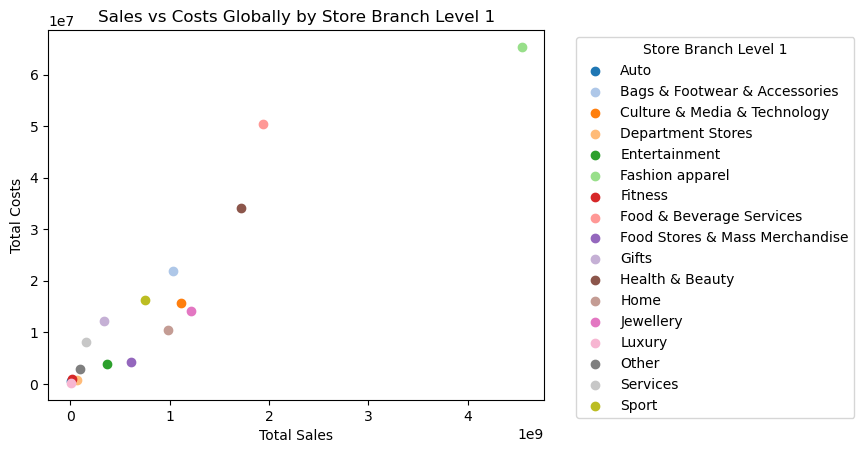

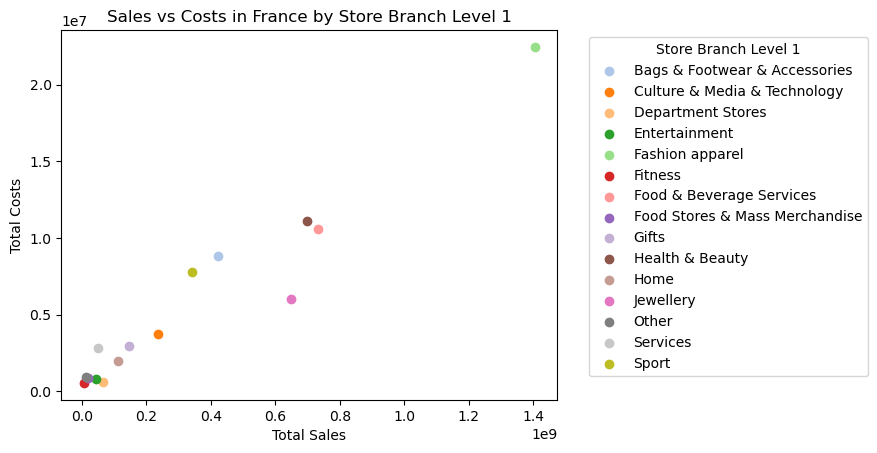

In [80]:
# Calculate total sales and total costs per store branch level 1 globally
global_sales_costs = store_final.groupby('store_branch_level_1').agg({
    'store_sales_r12m': 'sum',
    'service_charges_r12m': 'sum',
    'marketing_costs_r12m': 'sum',
    'administration_fees_r12m': 'sum',
    'real_estate_taxes_r12m': 'sum',
    'large_scale_works_r12m': 'sum',
    'maintenance_works_r12m': 'sum',
    'store_rent_r12m': 'sum'
})

# Sum all costs columns to get total costs
global_sales_costs['total_costs'] = global_sales_costs[['service_charges_r12m', 'marketing_costs_r12m', 'administration_fees_r12m', 'real_estate_taxes_r12m', 'large_scale_works_r12m', 'maintenance_works_r12m']].sum(axis=1)

# Define a colormap
cmap = plt.get_cmap('tab20')

# Create a color for each store branch level 1
colors = {category: cmap(i) for i, category in enumerate(global_sales_costs.index)}

# Plot sales vs costs globally
fig, ax = plt.subplots()
for category, color in colors.items():
    data = global_sales_costs.loc[category]
    ax.scatter(data['store_sales_r12m'], data['total_costs'], label=category, color=color)
    # ax.annotate(category, (data['store_sales_r12m'], data['total_costs']), fontsize=8)

# Add legend
ax.legend(title='Store Branch Level 1', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_title('Sales vs Costs Globally by Store Branch Level 1')
ax.set_xlabel('Total Sales')
ax.set_ylabel('Total Costs')
plt.show()

# Calculate total sales and total costs per store branch level 1 in France
france_sales_costs = store_final_france.groupby('store_branch_level_1').agg({
    'store_sales_r12m': 'sum',
    'service_charges_r12m': 'sum',
    'marketing_costs_r12m': 'sum',
    'administration_fees_r12m': 'sum',
    'real_estate_taxes_r12m': 'sum',
    'large_scale_works_r12m': 'sum',
    'maintenance_works_r12m': 'sum',
    'store_rent_r12m': 'sum'
})

# Sum all costs columns to get total costs
france_sales_costs['total_costs'] = france_sales_costs[['service_charges_r12m', 'marketing_costs_r12m', 'administration_fees_r12m', 'real_estate_taxes_r12m', 'large_scale_works_r12m', 'maintenance_works_r12m']].sum(axis=1)

# Plot sales vs costs in France
fig, ax = plt.subplots()
for category, color in colors.items():
    if category in france_sales_costs.index:
        data = france_sales_costs.loc[category]
        ax.scatter(data['store_sales_r12m'], data['total_costs'], label=category, color=color)
        # ax.annotate(category, (data['store_sales_r12m'], data['total_costs']), fontsize=8)

# Add legend
ax.legend(title='Store Branch Level 1', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_title('Sales vs Costs in France by Store Branch Level 1')
ax.set_xlabel('Total Sales')
ax.set_ylabel('Total Costs')
plt.show()

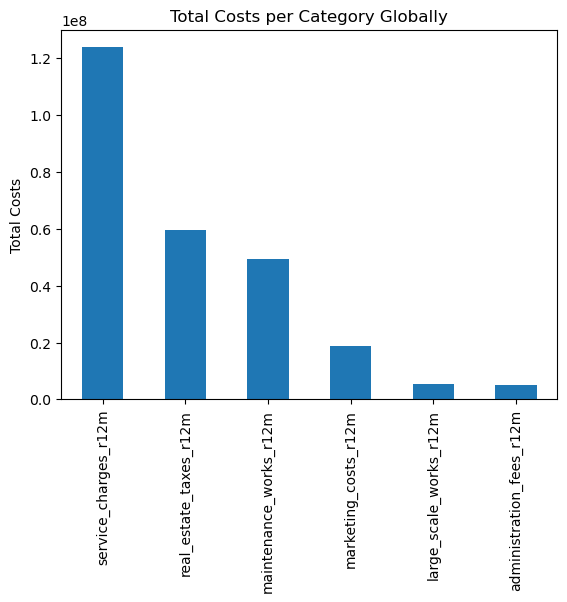

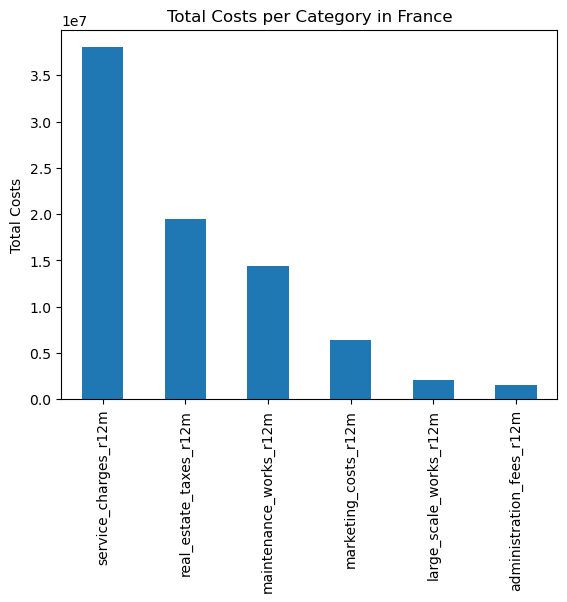

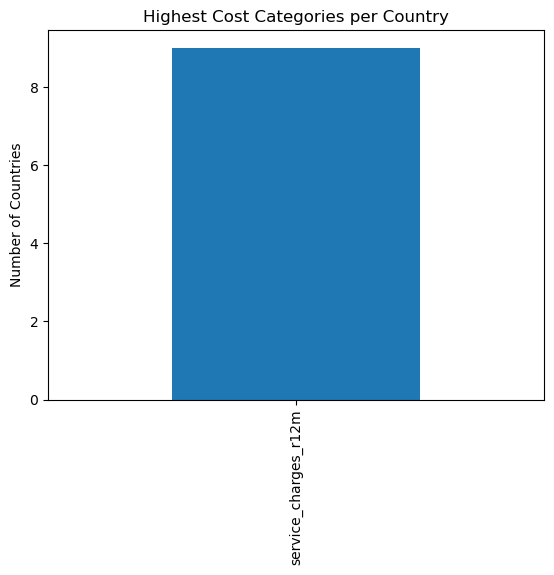

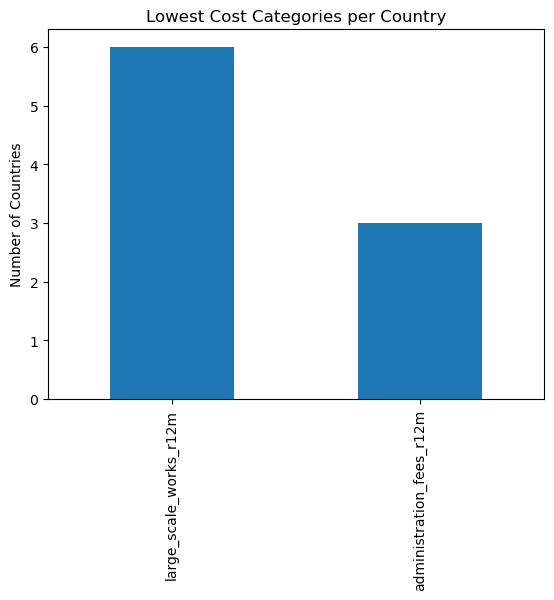

In [87]:
# Calculate the total costs per category globally
global_costs = global_sales_costs[['service_charges_r12m', 'marketing_costs_r12m', 'administration_fees_r12m', 'real_estate_taxes_r12m', 'large_scale_works_r12m', 'maintenance_works_r12m']].sum().sort_values(ascending=False)

# Plot the total costs per category globally
global_costs.plot(kind='bar', title='Total Costs per Category Globally')
plt.ylabel('Total Costs')
plt.show()

# Calculate the total costs per category in France
france_costs = france_sales_costs[['service_charges_r12m', 'marketing_costs_r12m', 'administration_fees_r12m', 'real_estate_taxes_r12m', 'large_scale_works_r12m', 'maintenance_works_r12m']].sum().sort_values(ascending=False)

# Plot the total costs per category in France
france_costs.plot(kind='bar', title='Total Costs per Category in France')
plt.ylabel('Total Costs')
plt.show()

# Calculate the highest and lowest cost categories per country
highest_costs_per_country = store_final.groupby('mall_country')[['service_charges_r12m', 'marketing_costs_r12m', 'administration_fees_r12m', 'real_estate_taxes_r12m', 'large_scale_works_r12m', 'maintenance_works_r12m']].sum().idxmax(axis=1)
lowest_costs_per_country = store_final.groupby('mall_country')[['service_charges_r12m', 'marketing_costs_r12m', 'administration_fees_r12m', 'real_estate_taxes_r12m', 'large_scale_works_r12m', 'maintenance_works_r12m']].sum().idxmin(axis=1)

# Plot the highest cost categories per country
highest_costs_per_country.value_counts().plot(kind='bar', title='Highest Cost Categories per Country')
plt.ylabel('Number of Countries')
plt.show()

# Plot the lowest cost categories per country
lowest_costs_per_country.value_counts().plot(kind='bar', title='Lowest Cost Categories per Country')
plt.ylabel('Number of Countries')
plt.show()

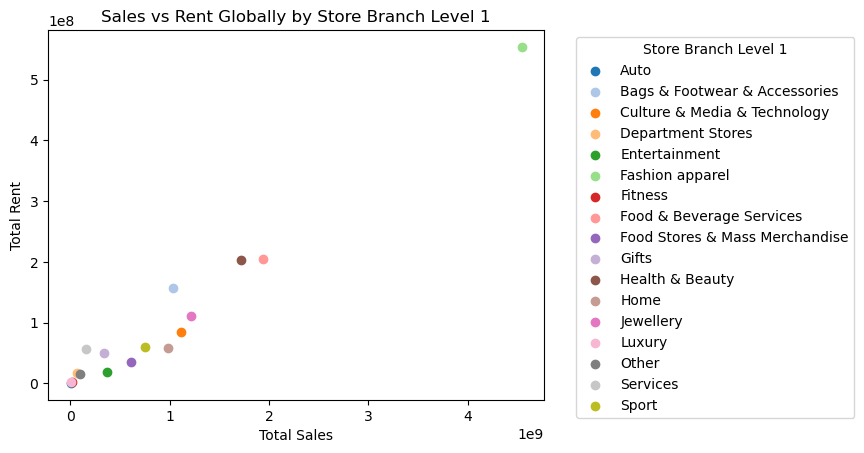

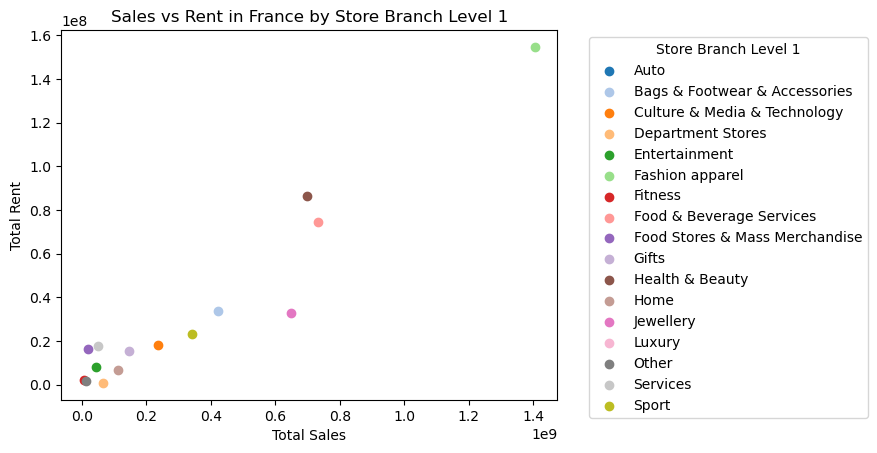

In [82]:
# Define a colormap
cmap = plt.get_cmap('tab20')

# Aggregate data by store_branch_level_1
agg_data = store_final.groupby('store_branch_level_1').agg({
    'store_sales_r12m': 'sum',
    'store_rent_r12m': 'sum'
}).reset_index()

# Create a color for each store branch level 1
colors = {category: cmap(i) for i, category in enumerate(agg_data['store_branch_level_1'].unique())}

# Plot the scatter plot globally
fig, ax = plt.subplots()
for category, color in colors.items():
    data = agg_data[agg_data['store_branch_level_1'] == category]
    ax.scatter(data['store_sales_r12m'], data['store_rent_r12m'], label=category, color=color)

# Add legend
ax.legend(title='Store Branch Level 1', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_title('Sales vs Rent Globally by Store Branch Level 1')
ax.set_xlabel('Total Sales')
ax.set_ylabel('Total Rent')
plt.show()

# Filter the data for France
store_france = store_final[store_final['mall_country'] == 'France']

# Aggregate data by store_branch_level_1 for France
agg_data_france = store_france.groupby('store_branch_level_1').agg({
    'store_sales_r12m': 'sum',
    'store_rent_r12m': 'sum'
}).reset_index()

# Plot the scatter plot for France
fig, ax = plt.subplots()
for category, color in colors.items():
    data = agg_data_france[agg_data_france['store_branch_level_1'] == category]
    ax.scatter(data['store_sales_r12m'], data['store_rent_r12m'], label=category, color=color)

# Add legend
ax.legend(title='Store Branch Level 1', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_title('Sales vs Rent in France by Store Branch Level 1')
ax.set_xlabel('Total Sales')
ax.set_ylabel('Total Rent')
plt.show()

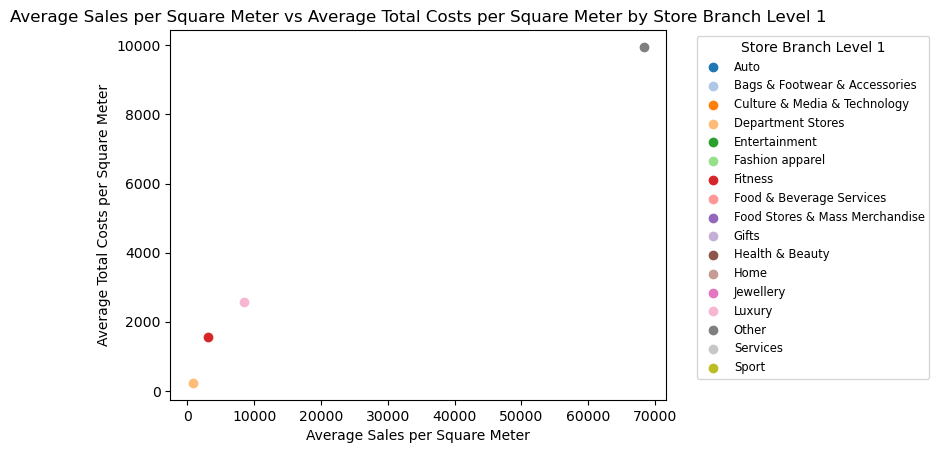

In [83]:
# Calculate total costs including store rent
store_final['total_costs'] = store_final[['service_charges_r12m', 'marketing_costs_r12m', 'administration_fees_r12m', 'real_estate_taxes_r12m', 'large_scale_works_r12m', 'maintenance_works_r12m', 'store_rent_r12m']].sum(axis=1)

# Calculate sales per square meter and total costs per square meter
store_final['sales_per_sqm'] = store_final['store_sales_r12m'] / store_final['store_area']
store_final['total_costs_per_sqm'] = store_final['total_costs'] / store_final['store_area']

# Group by store_branch_level_1 and calculate the mean for sales_per_sqm and total_costs_per_sqm
avg_values = store_final.groupby('store_branch_level_1').agg({
    'sales_per_sqm': 'mean',
    'total_costs_per_sqm': 'mean'
}).reset_index()

# Define a colormap
cmap = plt.get_cmap('tab20')

# Create a color for each store branch level 1
colors = {category: cmap(i) for i, category in enumerate(avg_values['store_branch_level_1'].unique())}

# Plot the scatter plot with colors
fig, ax = plt.subplots()
for category, color in colors.items():
    data = avg_values[avg_values['store_branch_level_1'] == category]
    ax.scatter(data['sales_per_sqm'], data['total_costs_per_sqm'], label=category, color=color)

# Add legend
ax.legend(title='Store Branch Level 1', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1, fontsize='small')
ax.set_title('Average Sales per Square Meter vs Average Total Costs per Square Meter by Store Branch Level 1')
ax.set_xlabel('Average Sales per Square Meter')
ax.set_ylabel('Average Total Costs per Square Meter')
plt.show()

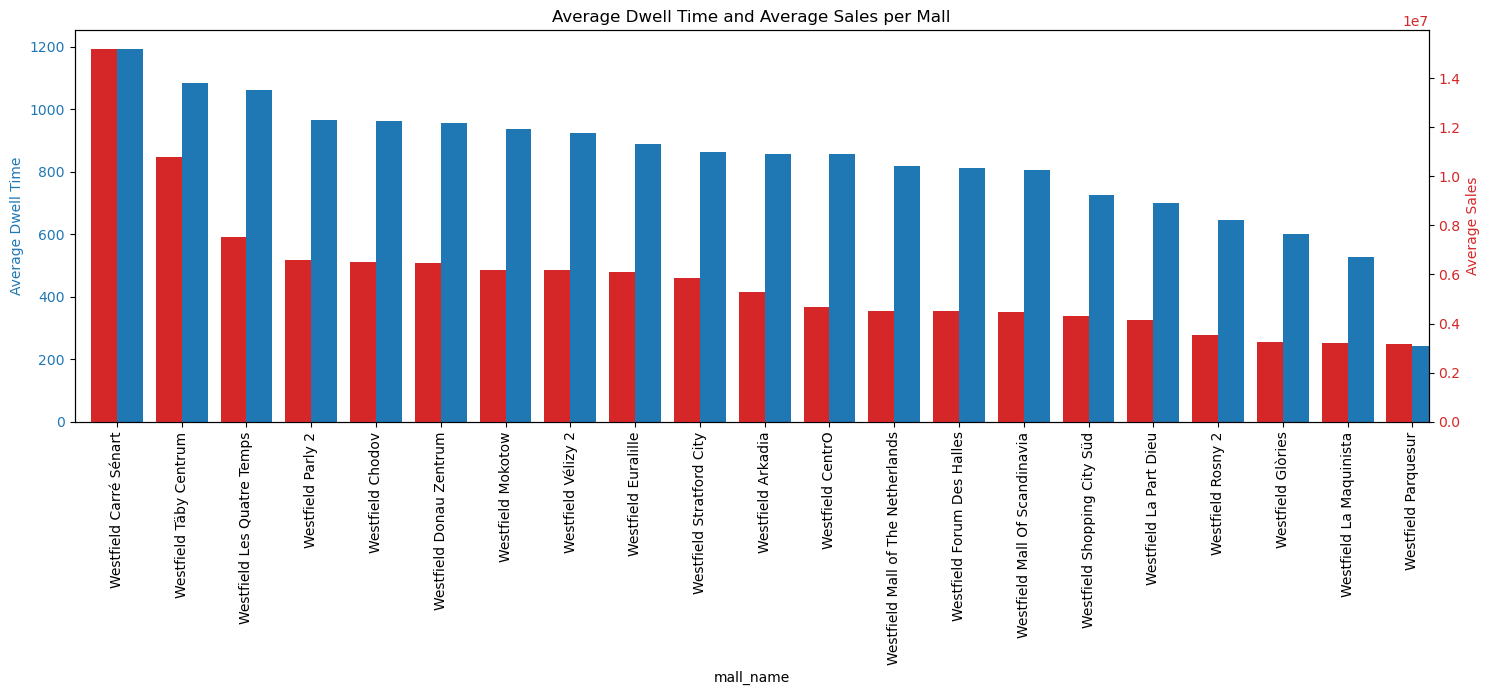

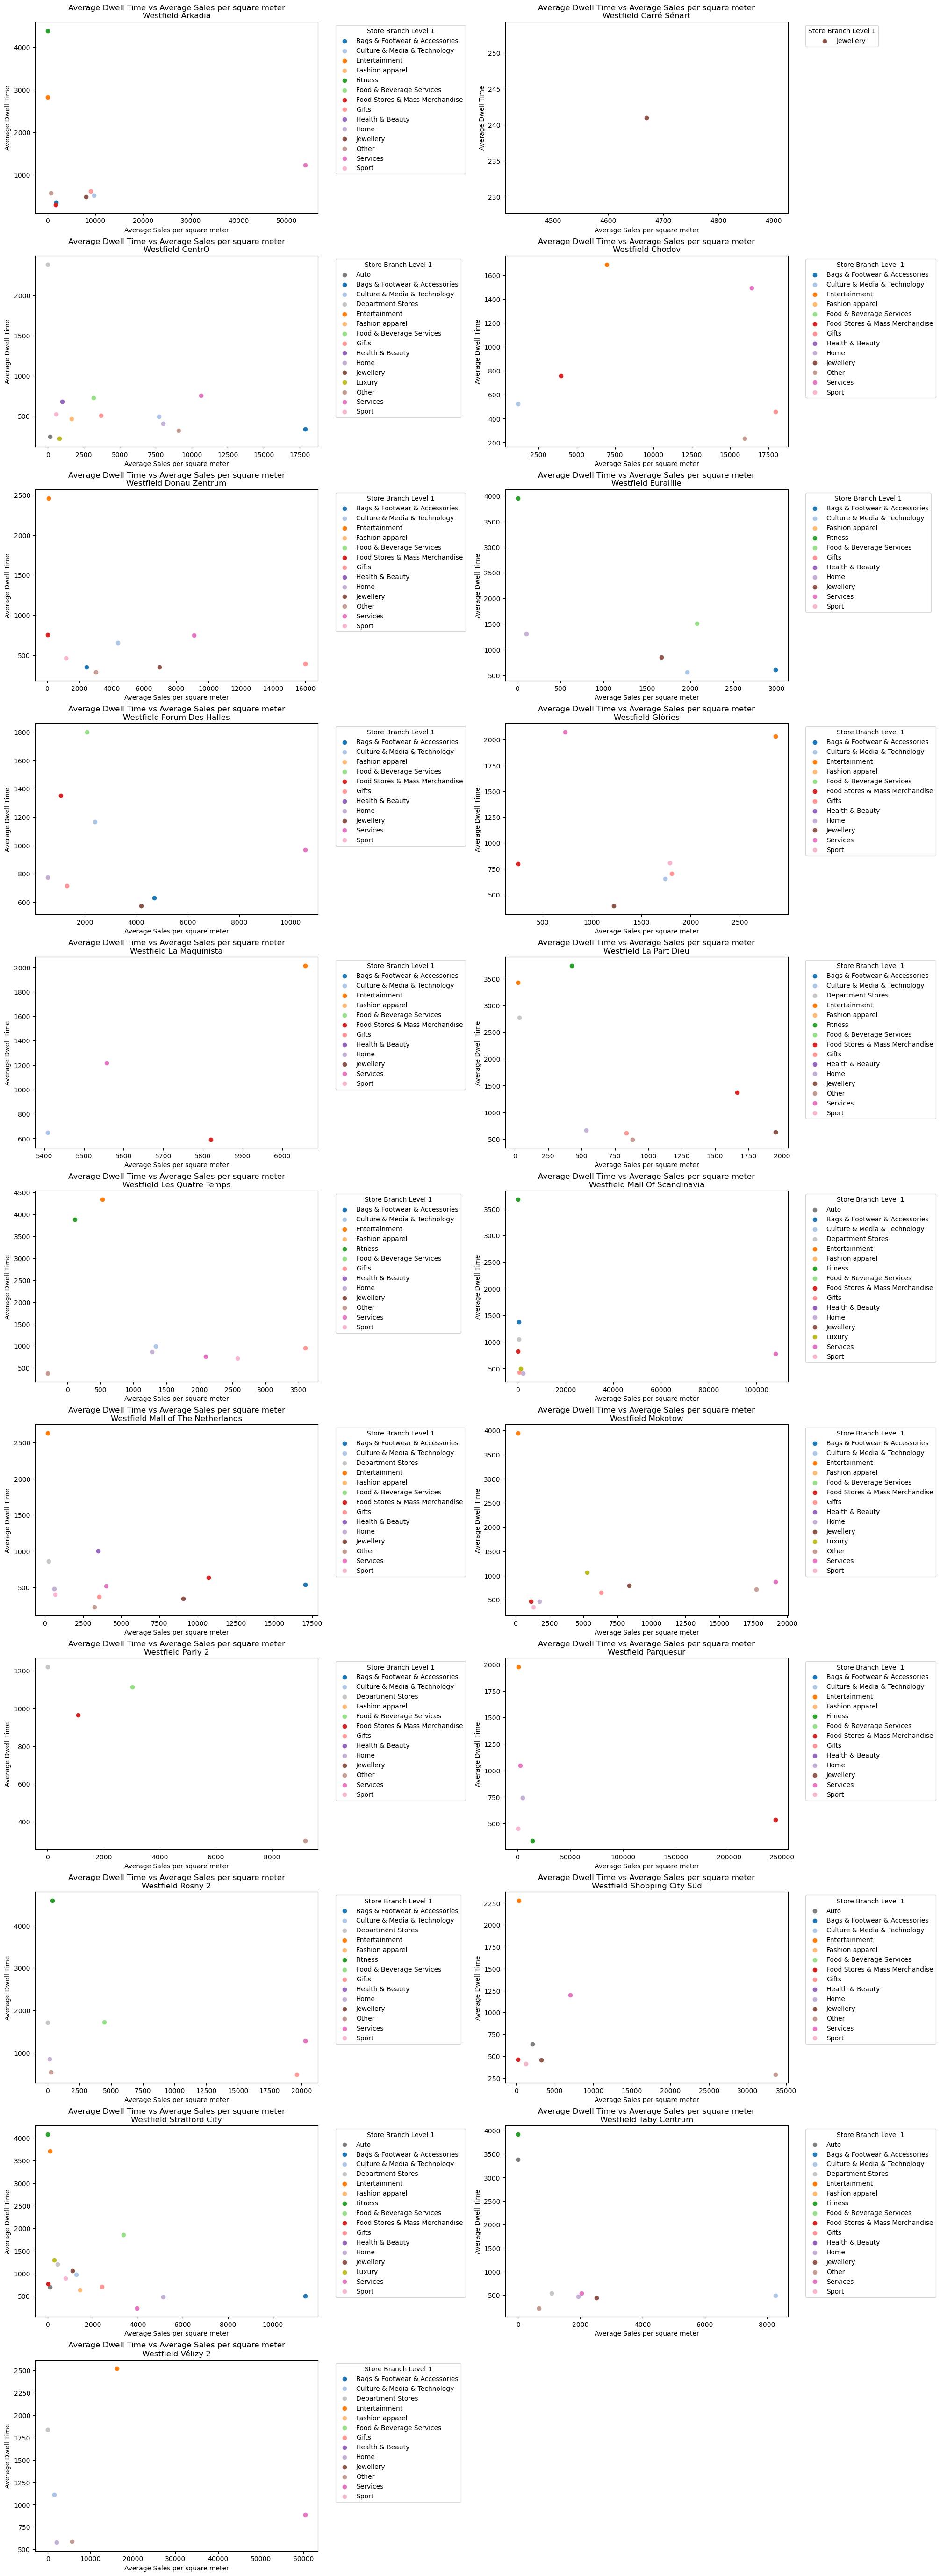

In [89]:
# Calculate the average dwell time per mall
avg_dwell_time_per_mall = store_final.groupby('mall_name')['average_dwell_time'].mean().sort_values(ascending=False)

# Calculate the average sales per mall
avg_sales_per_mall = store_final.groupby('mall_name')['store_sales_r12m'].mean().sort_values(ascending=False)

# Plot the average dwell time and average sales per mall
fig, ax1 = plt.subplots(figsize=(15, 7))

color = 'tab:blue'
ax1.set_xlabel('Mall Name')
ax1.set_ylabel('Average Dwell Time', color=color)
avg_dwell_time_per_mall.plot(kind='bar', ax=ax1, color=color, position=0, width=0.4)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Average Sales', color=color)
avg_sales_per_mall.plot(kind='bar', ax=ax2, color=color, position=1, width=0.4)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Average Dwell Time and Average Sales per Mall')
plt.show()

# Calculate the average dwell time and total sales per store branch level 1 in each mall
avg_dwell_time_sales_per_mall = store_final.groupby(['mall_name', 'store_branch_level_1']).agg({
    'average_dwell_time': 'mean',
    'total_costs_per_sqm': 'mean'
}).reset_index()

# Define a colormap
cmap = plt.get_cmap('tab20')

# Create a color for each store branch level 1
colors = {category: cmap(i) for i, category in enumerate(avg_dwell_time_sales_per_mall['store_branch_level_1'].unique())}

# Plot the average dwell time vs total sales for each shopping level 1 category in each mall
malls = avg_dwell_time_sales_per_mall['mall_name'].unique()
n_cols = 2
n_rows = (len(malls) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows), constrained_layout=True)
axes = axes.flatten()

for i, mall in enumerate(malls):
    mall_data = avg_dwell_time_sales_per_mall[avg_dwell_time_sales_per_mall['mall_name'] == mall]
    ax = axes[i]
    for category in mall_data['store_branch_level_1'].unique():
        category_data = mall_data[mall_data['store_branch_level_1'] == category]
        ax.scatter(category_data['total_costs_per_sqm'], category_data['average_dwell_time'], label=category, color=colors[category])
    ax.set_title(f'Average Dwell Time vs Average Sales per square meter\n{mall}')
    ax.set_xlabel('Average Sales per square meter')
    ax.set_ylabel('Average Dwell Time')
    ax.legend(title='Store Branch Level 1', bbox_to_anchor=(1.05, 1), loc='upper left')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.show()

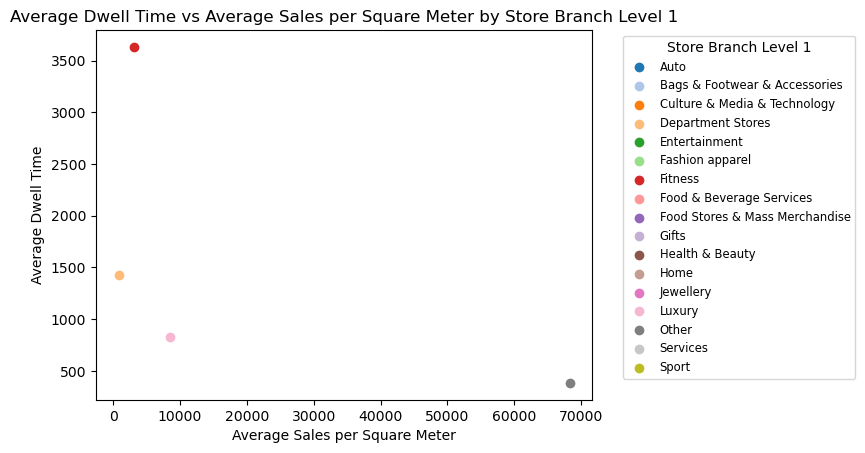

In [90]:
# Group by store_branch_level_1 and calculate the mean for average_dwell_time and sales_per_sqm
avg_dwell_time_sales_per_sqm = store_final.groupby('store_branch_level_1').agg({
    'average_dwell_time': 'mean',
    'sales_per_sqm': 'mean'
}).reset_index()

# Define a colormap
cmap = plt.get_cmap('tab20')

# Create a color for each store branch level 1
colors = {category: cmap(i) for i, category in enumerate(avg_dwell_time_sales_per_sqm['store_branch_level_1'].unique())}

# Plot the scatter plot with colors
fig, ax = plt.subplots()
for category, color in colors.items():
    data = avg_dwell_time_sales_per_sqm[avg_dwell_time_sales_per_sqm['store_branch_level_1'] == category]
    ax.scatter(data['sales_per_sqm'], data['average_dwell_time'], label=category, color=color)

# Add legend
ax.legend(title='Store Branch Level 1', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1, fontsize='small')
ax.set_title('Average Dwell Time vs Average Sales per Square Meter by Store Branch Level 1')
ax.set_xlabel('Average Sales per Square Meter')
ax.set_ylabel('Average Dwell Time')
plt.show()

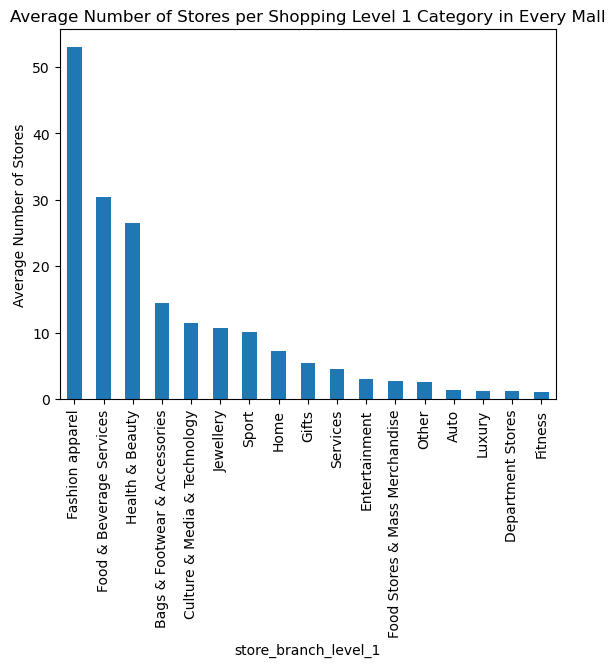

In [85]:
# Calculate the number of stores per shopping level 1 category in every mall
stores_per_category_mall = store_final.groupby(['mall_name', 'store_branch_level_1']).size().reset_index(name='store_count')

# Calculate the average number of stores per shopping level 1 category in every mall
avg_stores_per_category_mall = stores_per_category_mall.groupby('store_branch_level_1')['store_count'].mean().sort_values(ascending=False)

# Plot the average number of stores per shopping level 1 category in every mall
avg_stores_per_category_mall.plot(kind='bar', title='Average Number of Stores per Shopping Level 1 Category in Every Mall')
plt.ylabel('Average Number of Stores')
plt.show()

C:\Users\jules\AppData\Local\Temp\ipykernel_22952\3296109942.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_store_final['dwell_time_per_sqm_div_sales_per_sqm'] = filtered_store_final['average_dwell_time'] / filtered_store_final['sales_per_sqm']


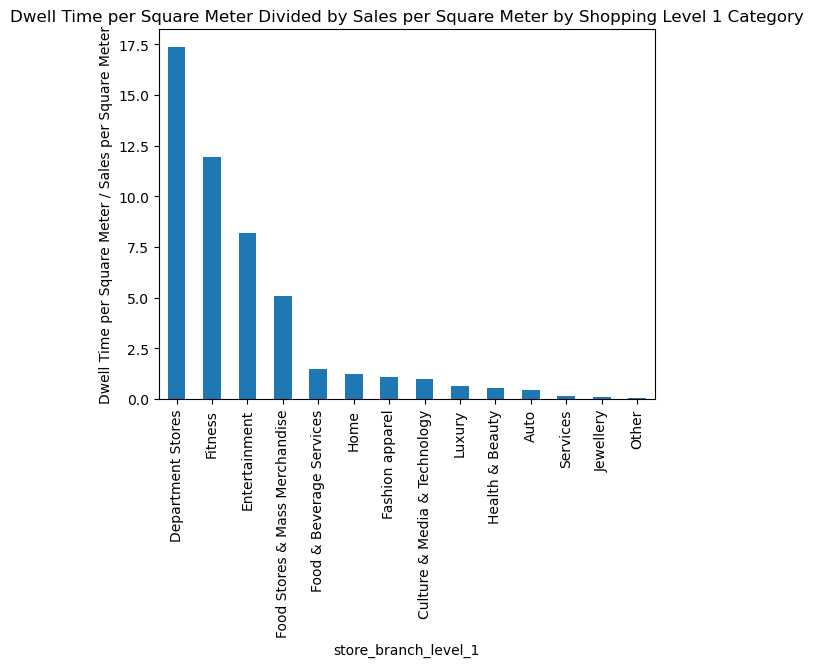

In [94]:
# Exclude specific categories
excluded_categories = ['Bags & Footwear & Accessories', 'Sport', 'Gifts']

# Filter out the excluded categories
filtered_store_final = store_final[~store_final['store_branch_level_1'].isin(excluded_categories)]

# Calculate dwell time per square meter divided by sales per square meter
filtered_store_final['dwell_time_per_sqm_div_sales_per_sqm'] = filtered_store_final['average_dwell_time'] / filtered_store_final['sales_per_sqm']

# Group by store_branch_level_1 and calculate the mean for dwell_time_per_sqm_div_sales_per_sqm
dwell_time_sales_ratio = filtered_store_final.groupby('store_branch_level_1')['dwell_time_per_sqm_div_sales_per_sqm'].mean()

# Remove bars with values equal to 0
dwell_time_sales_ratio = dwell_time_sales_ratio[dwell_time_sales_ratio != 0].sort_values(ascending=False)

# Plot the bar chart
dwell_time_sales_ratio.plot(kind='bar', title='Dwell Time per Square Meter Divided by Sales per Square Meter by Shopping Level 1 Category')
plt.ylabel('Dwell Time per Square Meter / Sales per Square Meter')
plt.show()

Westfield Carré Sénart:
 - Jewellery

Westfield Parquesur:
 - Food & Beverage Services
 - Health & Beauty
 - Culture & Media & Technology
 - Bags & Footwear & Accessories
 - Sport
 - Fashion apparel
 - Jewellery
 - Entertainment
 - Home
 - Gifts
 - Food Stores & Mass Merchandise
 - Fitness
 - Services

Westfield Täby Centrum:
 - Home
 - Culture & Media & Technology
 - Services
 - Food & Beverage Services
 - Health & Beauty
 - Jewellery
 - Bags & Footwear & Accessories
 - Fashion apparel
 - Other
 - Gifts
 - Entertainment
 - Fitness
 - Food Stores & Mass Merchandise
 - Sport
 - Department Stores
 - Auto



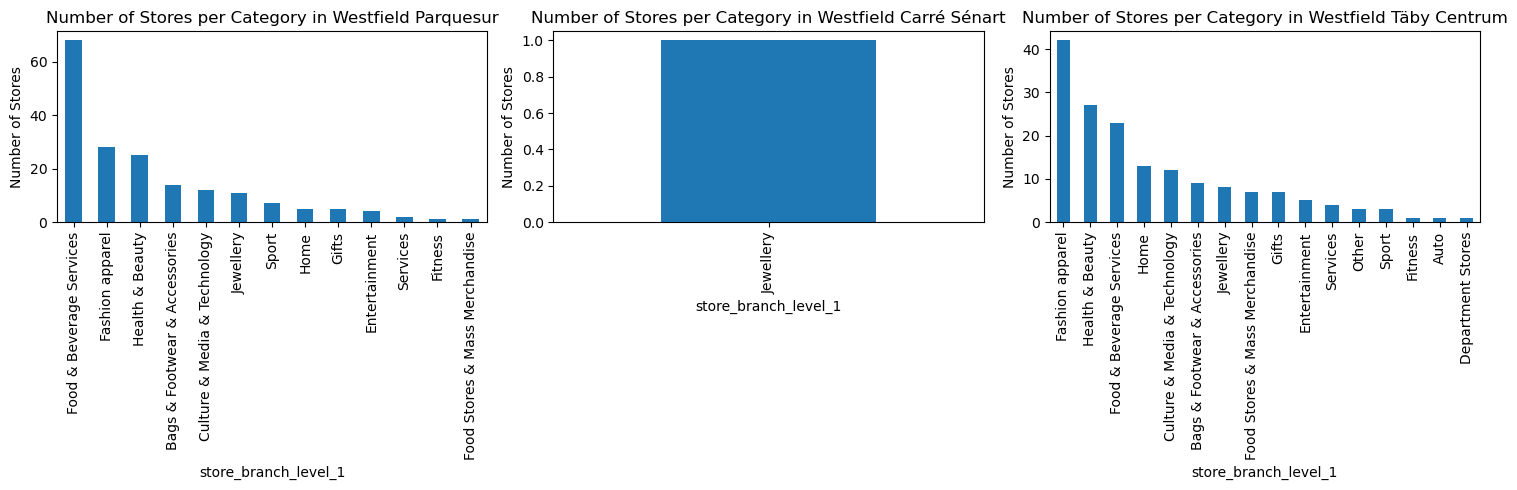

In [98]:
# Filter the data for the specified malls
malls_of_interest = ['Westfield Parquesur', 'Westfield Carré Sénart', 'Westfield Täby Centrum']
filtered_data = store_final[store_final['mall_name'].isin(malls_of_interest)]

# Get the unique shopping level 1 categories for each mall
categories_per_mall = filtered_data.groupby('mall_name')['store_branch_level_1'].unique()

# Display the categories
for mall, categories in categories_per_mall.items():
    print(f"{mall}:")
    for category in categories:
        print(f" - {category}")
    print()

# Sort the data in descending order
sorted_data = stores_per_category_mall[stores_per_category_mall['mall_name'].isin(malls_of_interest)]
sorted_data = sorted_data.sort_values(by='store_count', ascending=False)

# Plot the graphs next to each other
fig, axes = plt.subplots(nrows=1, ncols=len(malls_of_interest), figsize=(15, 5))

for i, mall in enumerate(malls_of_interest):
    ax = axes[i]
    mall_data = sorted_data[sorted_data['mall_name'] == mall]
    mall_data.plot(kind='bar', x='store_branch_level_1', y='store_count', ax=ax, legend=False, title=f'Number of Stores per Category in {mall}')
    ax.set_ylabel('Number of Stores')

plt.tight_layout()
plt.show()

In [86]:
store_final.columns

Index(['store_name', 'store_id', 'mall_id', 'store_year_opened',
       'store_year_closed', 'store_branch_level_1', 'store_branch_level_2',
       'store_branch_level_3', 'store_sales_r12m', 'store_rent_r12m',
       'store_area', 'average_dwell_time', 'median_dwell_time',
       'store_visits_monthly_average', 'store_window_flow_monthly_average',
       'store_visits_daily_average', 'store_window_flow_daily_average',
       'store_total_visits', 'store_total_window_flow',
       'days_with_traffic_data', 'mall_name', 'mall_country',
       'total_mall_area', 'rent_incentive_r12m', 'service_charges_r12m',
       'marketing_costs_r12m', 'administration_fees_r12m',
       'real_estate_taxes_r12m', 'large_scale_works_r12m',
       'maintenance_works_r12m', 'visits_in_monthly_average',
       'visits_out_monthly_average', 'visits_in_daily_average',
       'visits_out_daily_average', 'total_visits_in', 'total_visits_out',
       'avg_dwell_time', 'total_costs', 'sales_per_sqm',
       'tot